In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline



In [1]:
pwd

'C:\\Users\\Himanshu\\house_price_prediction'

In [45]:
# Load the datasets
train_df = pd.read_csv('data\\train.csv')
test_df = pd.read_csv('data\\test.csv')

In [47]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [51]:
# --------------------
# Step 1: Data Preprocessing
# --------------------

# Let's take a quick look at the training data to understand its structure
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [53]:
# Check for missing values in both train and test datasets
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Missing values in training data:\n", missing_values)

Missing values in training data:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [21]:
missing_values_test = test_df.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0].sort_values(ascending=False)
print("Missing values in test data:\n", missing_values_test)

Missing values in test data:
 PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64


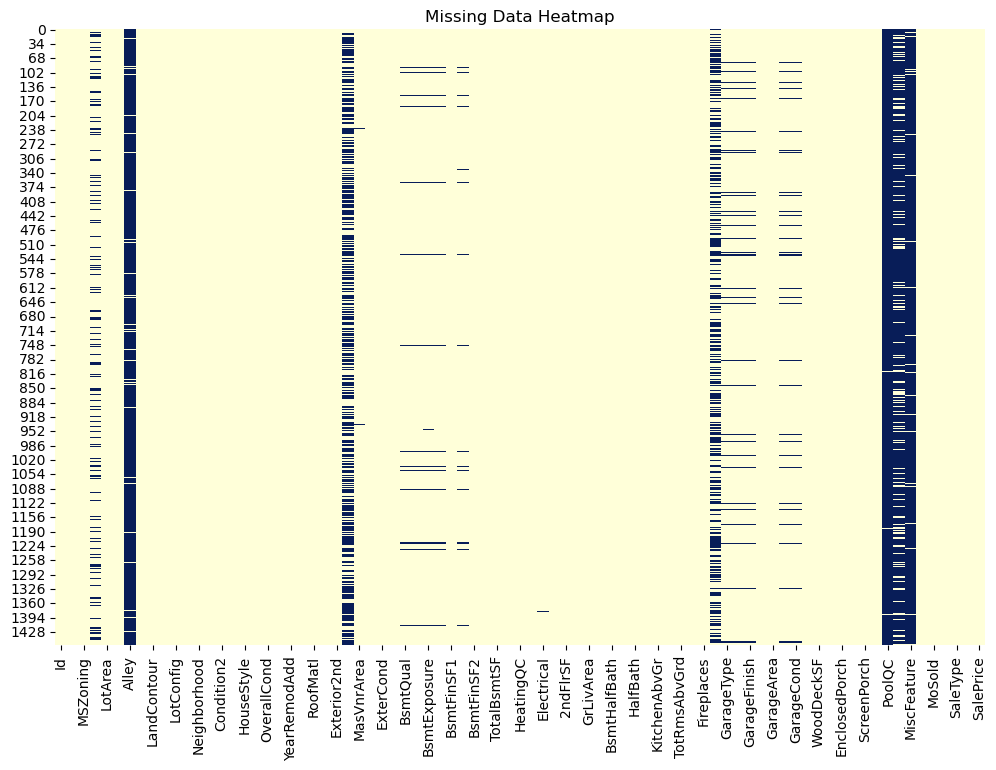

In [55]:
# We can visualize the missing data to understand its distribution
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Data Heatmap")
plt.show()


In [57]:
# Handle missing values:
# - For numerical columns: Impute using the mean
# - For categorical columns: Impute using the most frequent value
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
categorical_cols = train_df.select_dtypes(exclude=[np.number]).columns

In [59]:

# Remove the target variable 'SalePrice' from numeric columns as it should not be transformed
numeric_cols = [col for col in numeric_cols if col != 'SalePrice']


In [61]:
# Preprocessing pipelines for numeric columns
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [63]:
# Apply the pipeline to numeric columns in train_df and test_df
train_df[numeric_cols] = numeric_pipeline.fit_transform(train_df[numeric_cols])
test_df[numeric_cols] = numeric_pipeline.transform(test_df[numeric_cols])

In [65]:
# Convert categorical columns to one-hot encoding
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

In [67]:
# Align columns between train and test datasets
train_df, test_df = train_df.align(test_df, join='left', axis=1)

In [69]:
# Fill missing columns in test set with zeros (since some categories in train may not exist in test)
test_df = test_df.fillna(0)

Step 2: Exploratory Data Analysis (EDA)

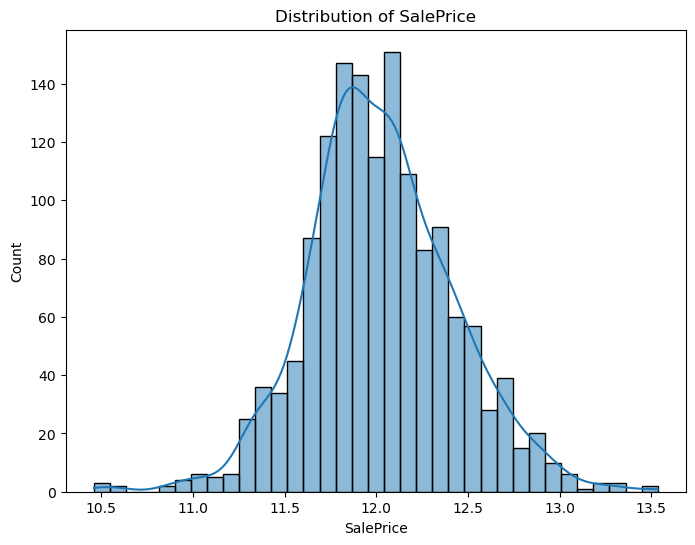

In [77]:
# Visualize distribution of the target variable 'SalePrice'
plt.figure(figsize=(8, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

In [75]:

# The target 'SalePrice' seems right-skewed, let's apply a log transformation to normalize it
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

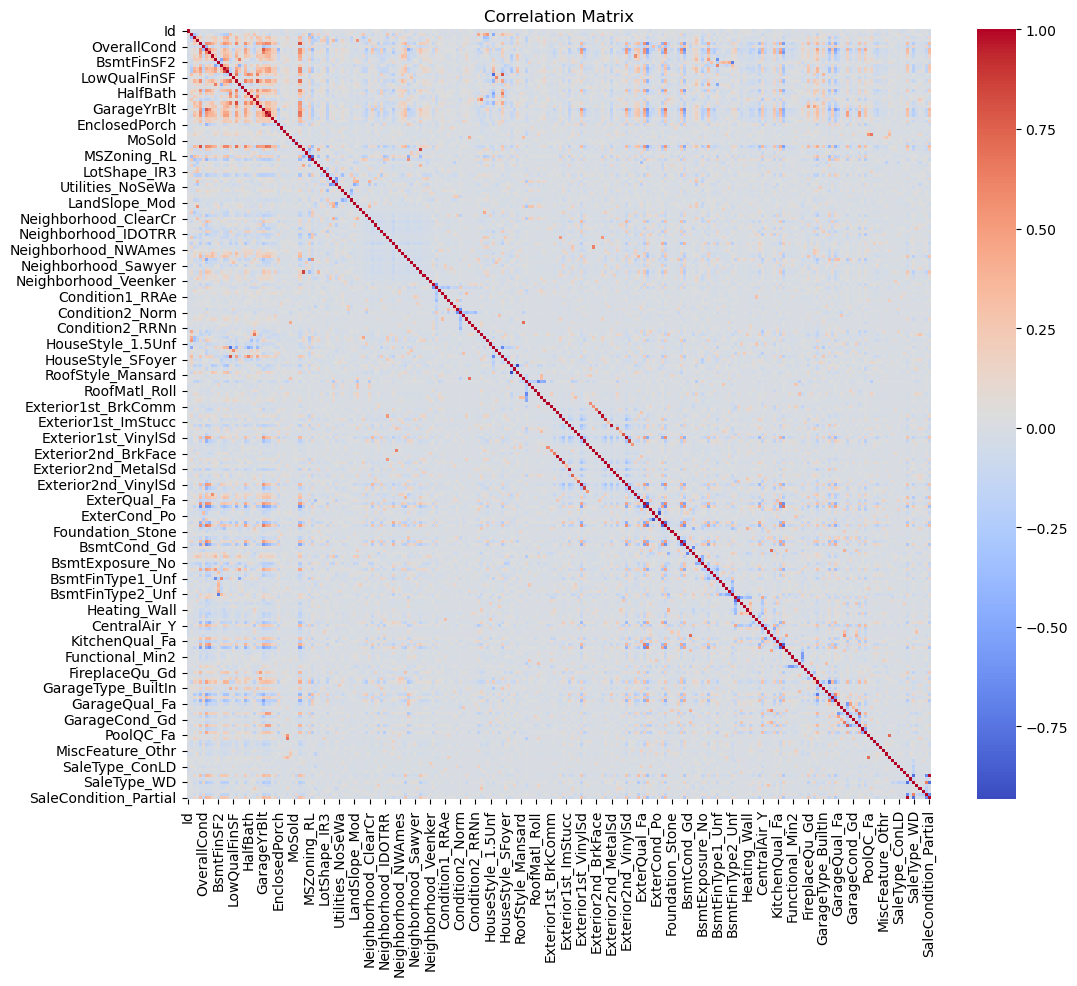

In [79]:
# Correlation Matrix - to understand relationships between features and 'SalePrice'
plt.figure(figsize=(12, 10))
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [81]:
# Let's look at the top correlations with 'SalePrice'
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False)
print("Top Correlated Features with SalePrice:\n", top_corr_features.head(10))

Top Correlated Features with SalePrice:
 SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
Name: SalePrice, dtype: float64


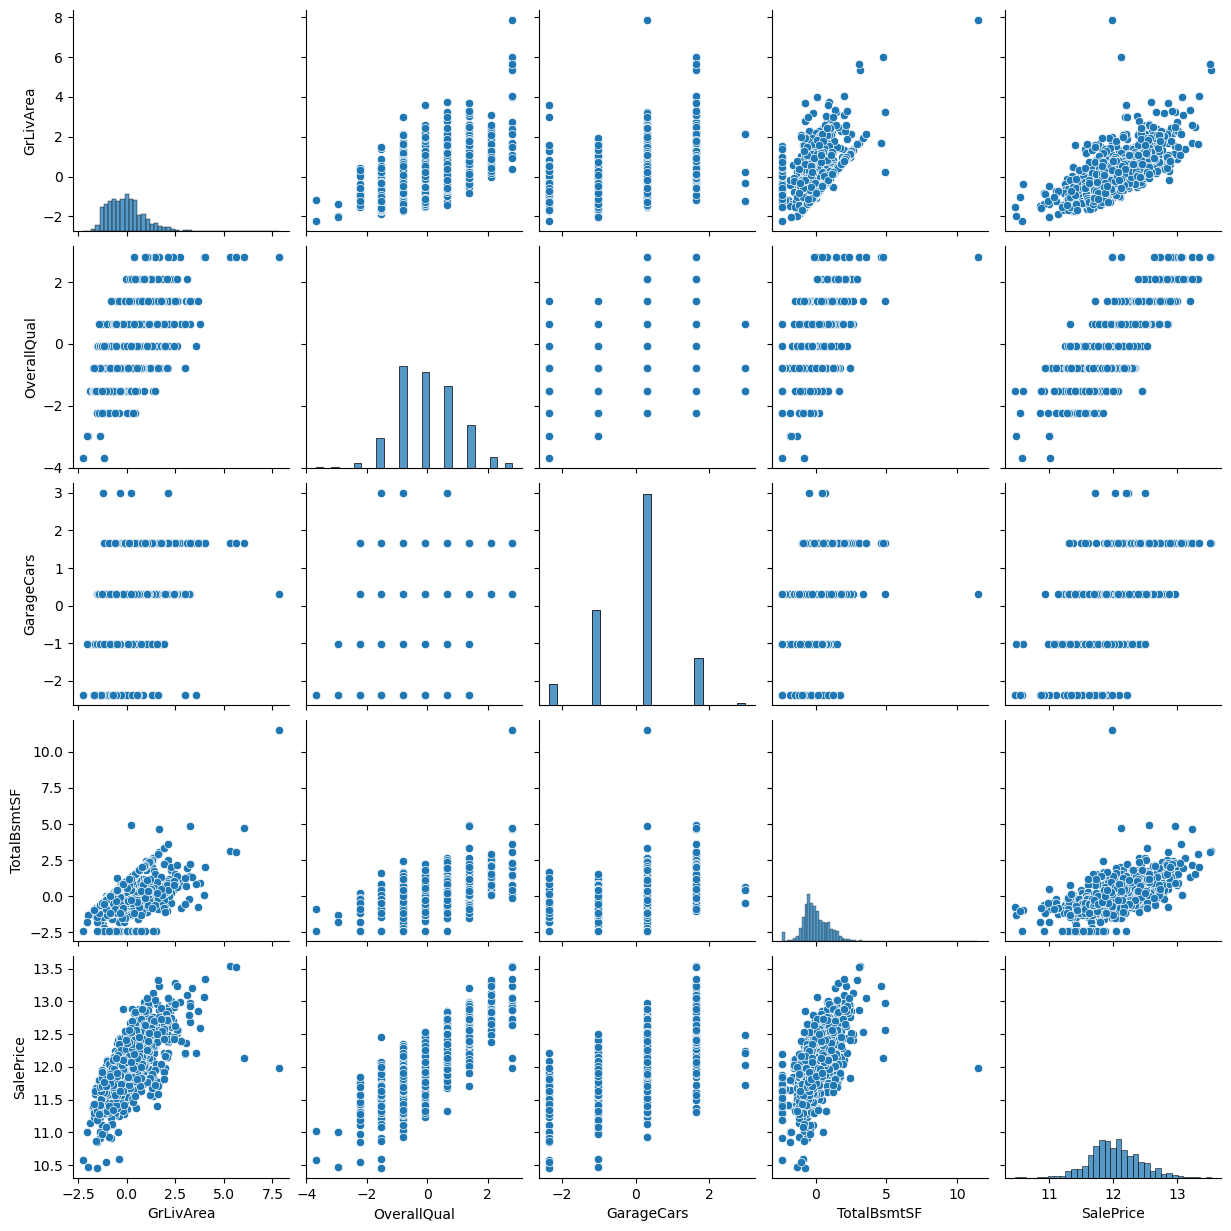

In [83]:
# Pairplot to visualize relationships between top features and SalePrice
sns.pairplot(train_df, vars=['GrLivArea', 'OverallQual', 'GarageCars', 'TotalBsmtSF', 'SalePrice'])
plt.show()


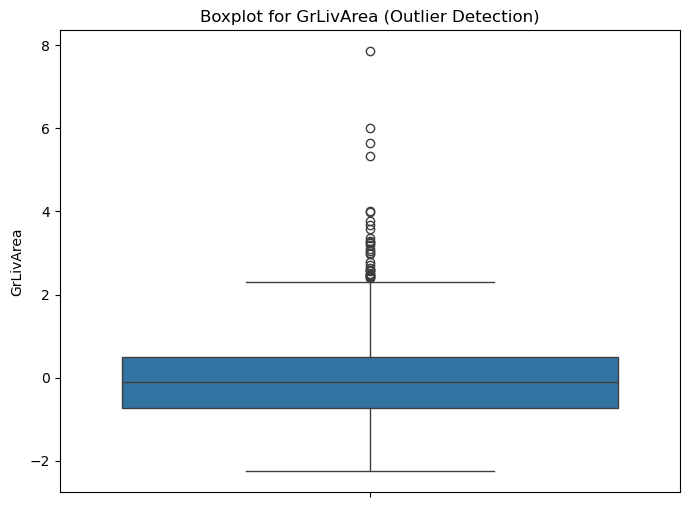

In [89]:
# Checking for outliers using a boxplot for GrLivArea
plt.figure(figsize=(8, 6))
sns.boxplot(train_df['GrLivArea'])
plt.title('Boxplot for GrLivArea (Outlier Detection)')
plt.show()

In [91]:
# Removing outliers in GrLivArea if necessary (based on boxplot inspection)
train_df = train_df[train_df['GrLivArea'] < 4000]  # Removing extreme outliers

# --------------------
 Step 3: Model Building and Evaluation
# --------------------

In [93]:
# Preparing features and target variable for modeling
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [95]:
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
# Initialize models
lin_reg = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [99]:
# Function to evaluate models using cross-validation
def evaluate_model(model, X_train, y_train):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    return rmse_scores.mean()

In [101]:
# Evaluate each model
print(f"Linear Regression RMSE: {evaluate_model(lin_reg, X_train, y_train)}")
print(f"Random Forest RMSE: {evaluate_model(rf_model, X_train, y_train)}")
print(f"Gradient Boosting RMSE: {evaluate_model(gb_model, X_train, y_train)}")


Linear Regression RMSE: 12683529066.59949
Random Forest RMSE: 0.1452652540856022
Gradient Boosting RMSE: 0.1327814243635057


In [103]:
# Based on the results, let's train the Gradient Boosting model (as it performs well)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [105]:
# Make predictions on the validation set
gb_preds = gb_model.predict(X_valid)

In [107]:
# Evaluate the performance using RMSE
gb_rmse = np.sqrt(mean_squared_error(y_valid, gb_preds))
print(f"Gradient Boosting RMSE on Validation Set: {gb_rmse}")

Gradient Boosting RMSE on Validation Set: 0.13682282669491175


# --------------------
# Step 4: Hyperparameter Tuning with GridSearchCV
# --------------------


In [111]:
# Define a parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}


In [113]:
# Use GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [115]:
# Get the best estimator from grid search
best_gb_model = grid_search.best_estimator_

In [117]:
# Evaluate the best model on the validation set
best_gb_preds = best_gb_model.predict(X_valid)
best_gb_rmse = np.sqrt(mean_squared_error(y_valid, best_gb_preds))

print(f"Best Gradient Boosting RMSE after tuning: {best_gb_rmse}")
print(f"Best Parameters from GridSearch: {grid_search.best_params_}")

Best Gradient Boosting RMSE after tuning: 0.13568351766367234
Best Parameters from GridSearch: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


# --------------------
# Step 5: Final Predictions on Test Set and Submission
# --------------------

In [124]:
# Ensure 'SalePrice' is not present in the test set
if 'SalePrice' in test_df.columns:
    test_df = test_df.drop('SalePrice', axis=1)



In [126]:
# Make final predictions on the test set using the best model
test_preds = np.exp(best_gb_model.predict(test_df))  # Reverting the log transformation


In [130]:
# Prepare the submission file
submission = pd.DataFrame({'Id': pd.read_csv('data//test.csv')['Id'], 'SalePrice': test_preds})
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!
